# 911 Calls Capstone Project
For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [6]:
df=pd.read_csv('911.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lat,99492.0,40.159526,0.094446,30.333596,40.100423,40.145223,40.229008,41.167156
lng,99492.0,-75.317464,0.174826,-95.595595,-75.392104,-75.304667,-75.212513,-74.995041
zip,86637.0,19237.658298,345.344914,17752.000000,19038.000000,19401.000000,19446.000000,77316.000000
e,99492.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* What are the top 5 zipcodes for 911 calls?
* What are the top 5 townships (twp) for 911 calls?
* Take a look at the 'title' column, how many unique title codes are there?

In [10]:
pd.DataFrame(df['zip'].value_counts().iloc[:5,])

,zip
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


In [6]:
pd.DataFrame(df['twp'].value_counts().iloc[:5,])

,twp
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


In [7]:
len(df['title'].unique())

110

* In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.
* For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. 
* What is the most common Reason for a 911 call based off of this new column? 

In [11]:
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])

In [12]:
df['Reason'].value_counts().index[0]

'EMS'

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

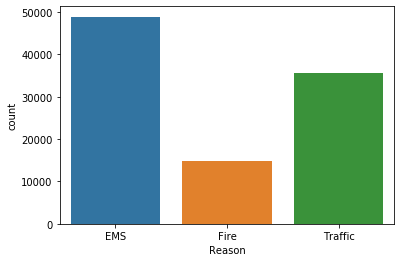

In [13]:
sns.countplot(x='Reason', data=df)
plt.show()

* Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?
* We should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.

In [11]:
df['timeStamp'].map(type)[0]

str

*You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.*

In [15]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**
* Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

        dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Hour']=df['timeStamp'].apply(lambda x: x.hour)
df['Month']=df['timeStamp'].apply(lambda x: x.month)

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df['Day of Week']=df['timeStamp'].apply(lambda x: x.weekday()).map(dmap)

*Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.*

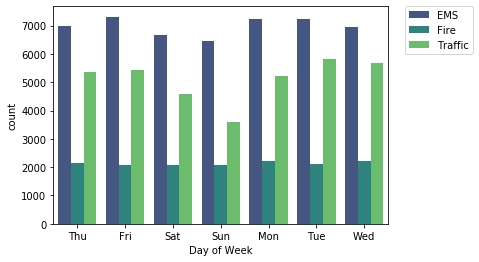

In [19]:
sns.countplot(x='Day of Week', hue='Reason', data=df, palette='viridis').legend(loc='center left',bbox_to_anchor=(1, 0.9))
# another way for legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0)

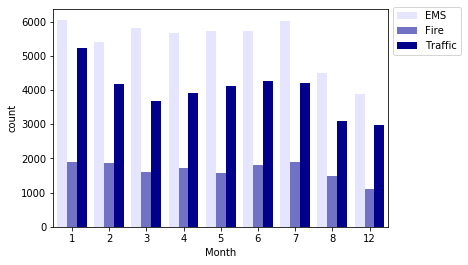

In [17]:
sns.countplot(x='Month', hue='Reason', data=df, color='darkblue',  saturation=1).legend(loc='center left',bbox_to_anchor=(1, 0.9)) 

In [21]:
df['Month'].value_counts() # data for some months is missing, so we need to create data to fill the gaps

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: Month, dtype: int64

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [20]:
ByMonth=df.groupby('Month').count()
ByMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


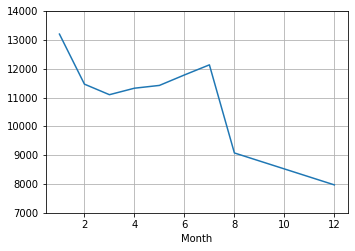

In [21]:
fig=plt.figure()
ax=fig.add_axes([0,0,0.7,0.7])
ax.plot(ByMonth['Reason'])
ax.grid()
ax.set_xlabel('Month')
ax.set_ylim((7000,14000))
plt.show()

In [19]:
ByMonth.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 12], dtype='int64', name='Month')

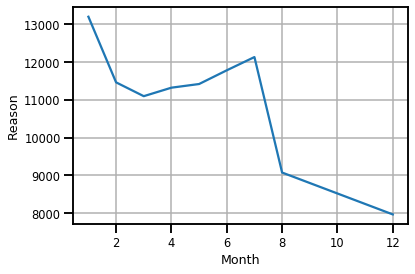

In [20]:
sns.set_context('talk', font_scale=0.7)
sns.lineplot(ByMonth.index, 'Reason', data=ByMonth).grid()

*Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.*

In [27]:
ByMonth.reset_index(inplace=True)

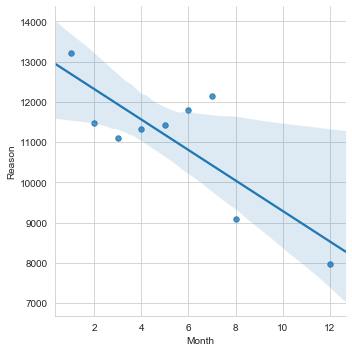

In [28]:
sns.set_style('whitegrid')
sns.lmplot('Month', 'Reason', data=ByMonth, 
           markers=['o'], scatter_kws={'s':30}
          ,palette='siesmic')

*Create a new column called 'Date' that contains the date from the timeStamp column.* 

In [22]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())

*Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.*

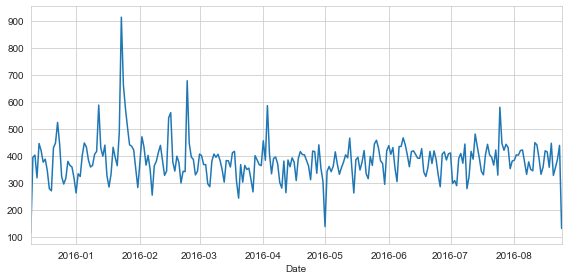

In [29]:
df.groupby('Date').count()['twp'].plot.line(figsize=(8,4))
# another way to expand and solve overlapping
plt.tight_layout()

*Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call*

In [24]:
pvt=pd.pivot_table(index='Date', columns='Reason', values='twp', aggfunc='count', data=df)
pvt.head()

Reason,EMS,Fire,Traffic
Date,,,
2015-12-10,57,15,43
2015-12-11,186,68,141
2015-12-12,189,68,146
2015-12-13,190,51,78
2015-12-14,222,38,186


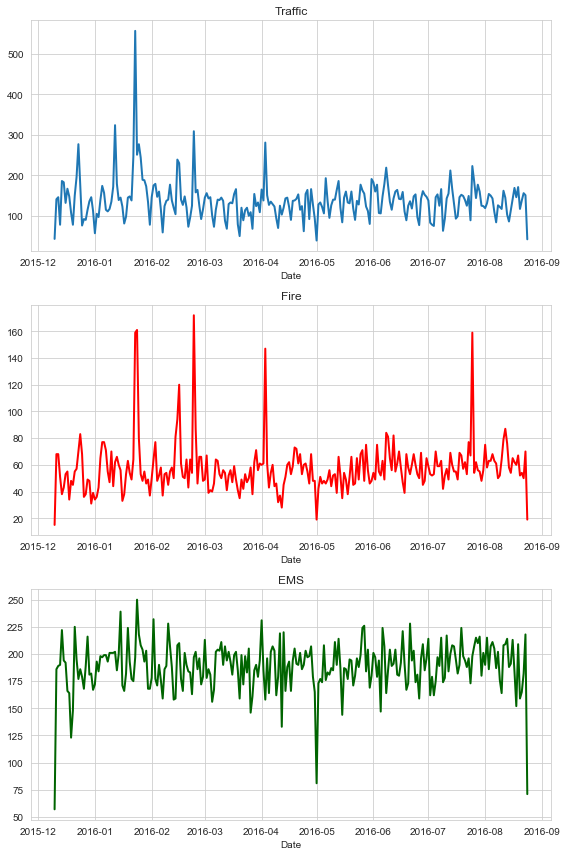

In [30]:
fig,ax=plt.subplots(nrows=3,ncols=1, figsize=(8,12))
ax[0].plot(pvt['Traffic'], lw=2,ls='-', )
ax[1].plot(pvt['Fire'], lw=2,ls='-', color='red')
ax[2].plot(pvt['EMS'], lw=2,ls='-', color='darkgreen')
ax[0].set_xlabel('Date')
ax[0].set_title('Traffic')
ax[1].set_xlabel('Date')
ax[1].set_title('Fire')
ax[2].set_xlabel('Date')
ax[2].set_title('EMS')
plt.tight_layout()
plt.show()

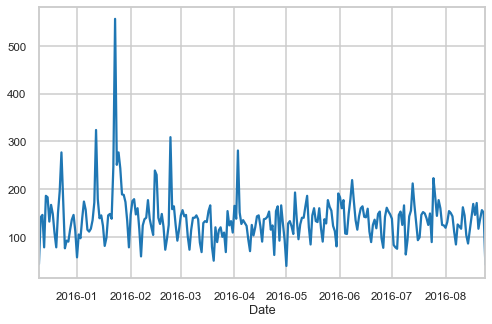

In [166]:
# another way is:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot(figsize=(8,5))

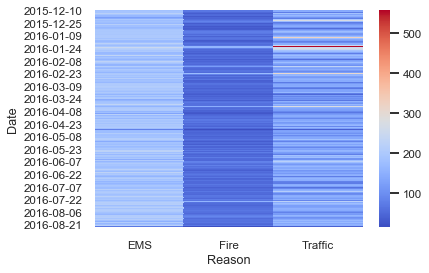

In [32]:
sns.heatmap(pvt, cmap='coolwarm')

*Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!*

In [33]:
heat=df.pivot_table(index='Day of Week', columns='Hour', values='twp' , aggfunc='count')
heat.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


In [177]:
df.groupby(['Day of Week','Hour']).count().unstack()['lat']

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


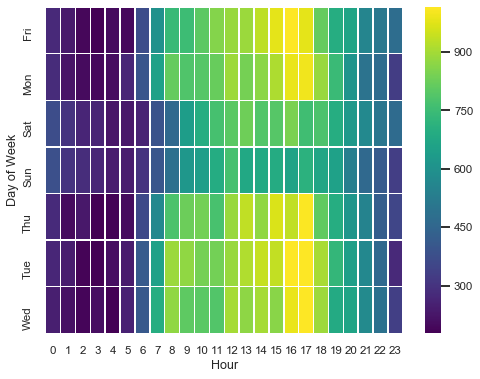

In [183]:
plt.figure(figsize=(8,6))
sns.heatmap(heat, cmap='viridis', linecolor='white', robust=True, linewidths=0.5)

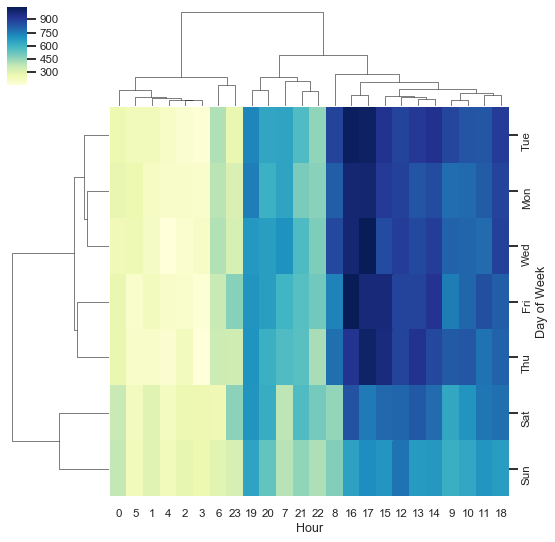

In [78]:
sns.clustermap(heat,figsize=(9,9), cmap='YlGnBu')

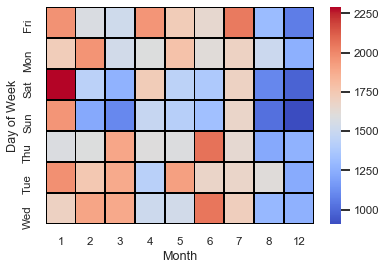

In [197]:
sns.heatmap(df.groupby(['Day of Week','Month']).count()['lat'].unstack(), cmap='coolwarm', linecolor='black', linewidths=0.8)

# End of Fist Project

# Finance Project Overview Data Capstone

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

*We need to get data using pandas datareader. We will get stock information for the following banks:*
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

*Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:*
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

*Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:*
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [ ]:
pip install pandas-datareader

In [238]:
import pandas_datareader as pdr
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pdr.DataReader(['BAC','C','GS','JPM','MS','WFC'], 'yahoo', start=dt.date(2006,1,1), end=dt.date(2016,1,1))
df.head()

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  35.298687  445.561951  107.575417  27.529718  37.758644   
2006-01-04  34.923801  437.335999  106.089539  27.370821  37.784546   
2006-01-05  34.968796  439.505585  106.047821  27.453718  37.888165   
2006-01-06  34.916302  439.505585  107.550362  27.647156  37.927017   
2006-01-09  34.938789  437.426453  108.844261  28.096193  38.328484   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  20.823185  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  20.581659  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  20.558811  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  20.679575  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  20.676311  46.599998  483.899994  130.389999  40.669998  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400.0   

Attributes                                                           
Symbols             C         GS         JPM         MS         WFC  
Date                                                                 
2006-01-03  1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04  1870900.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05  1143100.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06  1370200.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09  1680700.0  4723500.0  16575200.0  4144500.0   5619600.0  

[5 rows x 36 columns]

In [3]:
df=df.swaplevel(i=0,j=1, axis=1)

In [4]:
df=df.reindex(sorted(df.columns), axis=1)
df.head()

Symbols           BAC                                                          \
Attributes  Adj Close      Close       High        Low       Open      Volume   
Date                                                                            
2006-01-03  35.298687  47.080002  47.180000  46.150002  46.919998  16296700.0   
2006-01-04  34.923801  46.580002  47.240002  46.450001  47.000000  17757900.0   
2006-01-05  34.968796  46.639999  46.830002  46.320000  46.580002  14970700.0   
2006-01-06  34.916302  46.570000  46.910000  46.349998  46.799999  12599800.0   
2006-01-09  34.938789  46.599998  46.970001  46.360001  46.720001  15619400.0   

Symbols              C                                      ...         MS  \
Attributes   Adj Close       Close        High         Low  ...       High   
Date                                                        ...              
2006-01-03  445.561951  492.899994  493.799988  481.100006  ...  58.490002   
2006-01-04  437.335999  483.799988  491.000000  483.500000  ...  59.279999   
2006-01-05  439.505585  486.200012  487.799988  484.000000  ...  58.590000   
2006-01-06  439.505585  486.200012  489.000000  482.000000  ...  58.849998   
2006-01-09  437.426453  483.899994  487.399994  483.000000  ...  59.290001   

Symbols                                            WFC                        \
Attributes        Low       Open     Volume  Adj Close      Close       High   
Date                                                                           
2006-01-03  56.740002  57.169998  5377000.0  20.823185  31.900000  31.975000   
2006-01-04  58.349998  58.700001  7977800.0  20.581659  31.530001  31.820000   
2006-01-05  58.020000  58.549999  5778000.0  20.558811  31.495001  31.555000   
2006-01-06  58.049999  58.770000  6889800.0  20.679575  31.680000  31.775000   
2006-01-09  58.619999  58.630001  4144500.0  20.676311  31.674999  31.825001   

Symbols                                       
Attributes        Low       Open      Volume  
Date                                          
2006-01-03  31.195000  31.600000  11016400.0  
2006-01-04  31.365000  31.799999  10870000.0  
2006-01-05  31.309999  31.500000  10158000.0  
2006-01-06  31.385000  31.580000   8403800.0  
2006-01-09  31.555000  31.674999   5619600.0  

[5 rows x 36 columns]

**Second way**

In [5]:
BAD=pdr.DataReader('BAC', 'yahoo', start=dt.date(2006,1,1), end=dt.date(2016,1,1))
C=pdr.DataReader('C', 'yahoo', start=dt.date(2006,1,1), end=dt.date(2016,1,1))
GS=pdr.DataReader('GS', 'yahoo', start=dt.date(2006,1,1), end=dt.date(2016,1,1))
JMP=pdr.DataReader('JPM', 'yahoo', start=dt.date(2006,1,1), end=dt.date(2016,1,1))
MS=pdr.DataReader('MS', 'yahoo', start=dt.date(2006,1,1), end=dt.date(2016,1,1))
WFC=pdr.DataReader('WFC', 'yahoo', start=dt.date(2006,1,1), end=dt.date(2016,1,1))

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [31]:
tickers='JPM MS WFC GS BAC C'.split()
tickers=sorted(tickers)

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [39]:
bank_stocks=pd.concat([BAD,C,GS,JMP,MS,WFC], axis=1, keys=tickers)

In [43]:
bank_stocks.index.names

FrozenList(['Date'])

In [44]:
bank_stocks.columns.names

FrozenList([None, None])

In [45]:
bank_stocks.columns.names= ['Bank Ticker','Stock Info']

In [46]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.927017  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.328484  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.823185  
2006-01-04   31.799999  31.530001  10870000.0  20.581659  
2006-01-05   31.500000  31.495001  10158000.0  20.558811  
2006-01-06   31.580000  31.680000   8403800.0  20.679575  
2006-01-09   31.674999  31.674999   5619600.0  20.676311  

[5 rows x 36 columns]

# EDA

*Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.*

**What is the max Close price for each bank's stock throughout the time period?**

In [81]:
bank_stocks.xs('Close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$


In [210]:
returns=pd.DataFrame(index=bank_stocks.index, columns=[s + ' Return' for s in tickers])

In [211]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
returns.columns

Index(['BAC Return', 'C Return', 'GS Return', 'JPM Return', 'MS Return',
       'WFC Return'],
      dtype='object')

In [275]:
for i in tickers:
    for j in range(len(bank_stocks.index)): 
        diff=(bank_stocks[i,'Close'][j]-bank_stocks[i,'Close'][j-1])/bank_stocks[i,'Close'][j-1]
        returns[i+' Return'][j]=diff
returns.iloc[0]=np.nan

In [276]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Second Method**

In [282]:
fill_data=bank_stocks.xs('Close', level='Stock Info', axis=1).pct_change()
fill_data.head(6)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789


In [233]:
# function to transfer data from ne df to another
def transfer(source, dest):
    for i in range(len(source.columns)):
        for j in range(len(dest.columns)):
            if source.columns[i] in dest.columns[j]:
                dest.iloc[:,j]=source.iloc[:,i]

In [234]:
transfer(fill_data,returns)

In [236]:
returns.head(3)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.018462,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.004961,0.004961,-0.000393,0.003029,0.002742,-0.001110


**Third Method**

In [353]:
for tick in tickers:
    returns[tick+' Return']=bank_stocks[tick]['Close'].pct_change()

In [355]:
returns.head(3)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [261]:
sns.set_style('whitegrid')
sns.set_context()

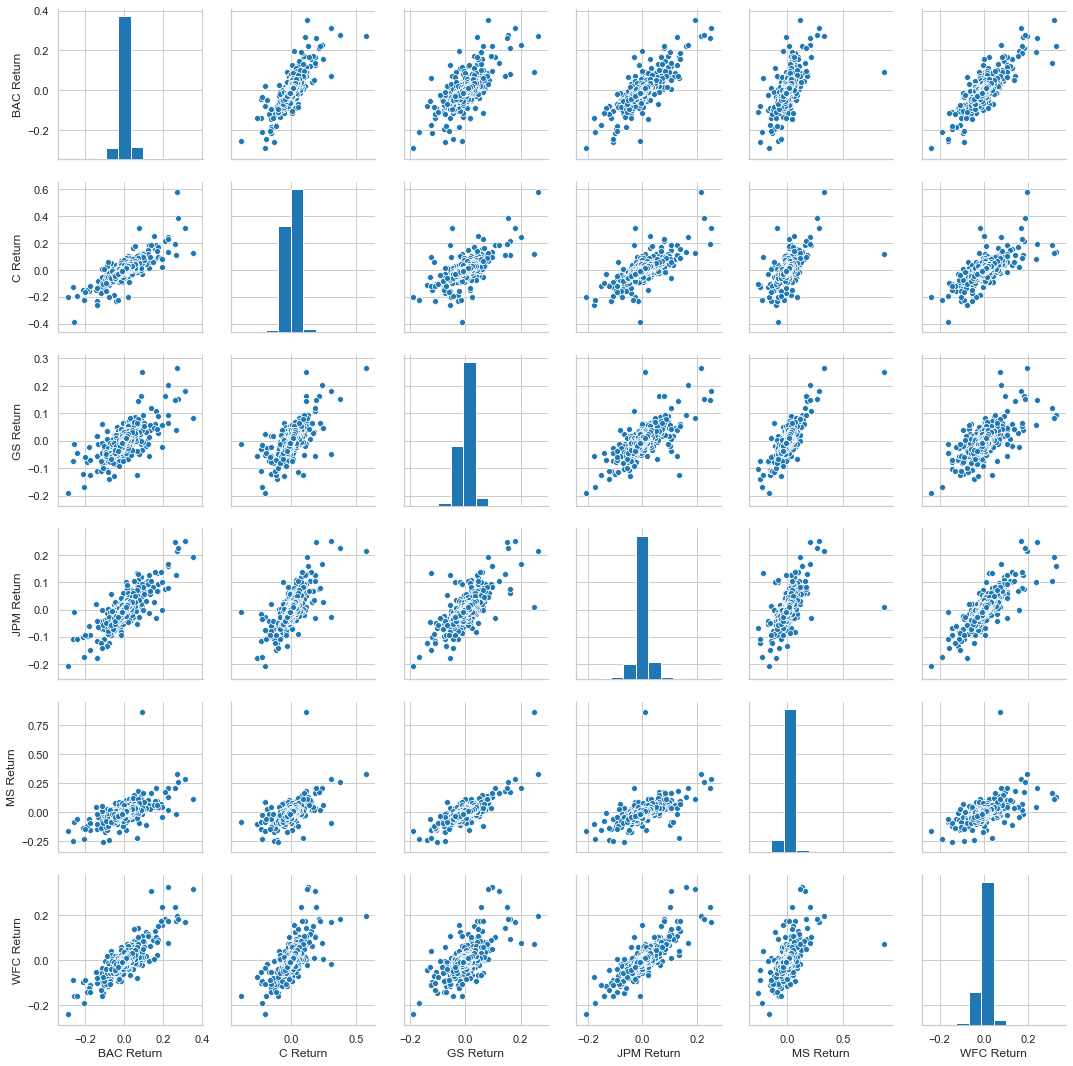

In [358]:
sns.pairplot(returns[1:])
plt.show()

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [284]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [285]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [286]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [364]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**
**Create a distplot using seaborn of the 2008 returns for CitiGroup**

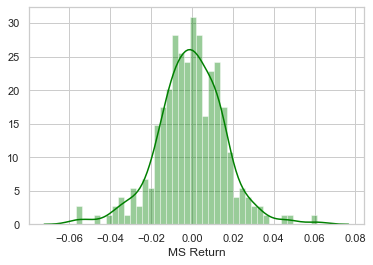

In [375]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins=40, color='green')

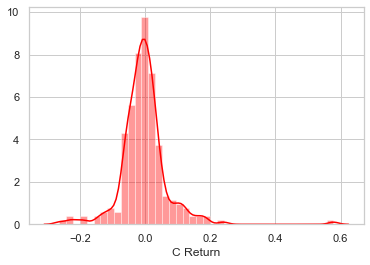

In [378]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins=40, color='red')

In [379]:
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

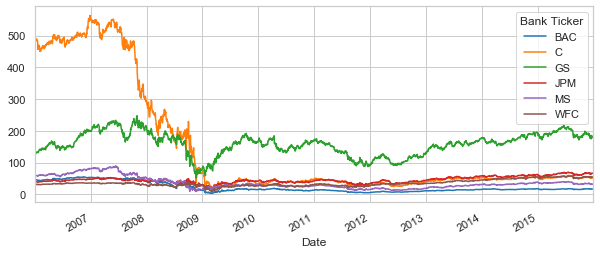

In [389]:
bank_stocks.xs('Close', level=1, axis=1).plot(figsize=(10,4))

In [390]:
bank_stocks.xs('Close', level=1, axis=1).iplot()

**Moving Averages**

Let's analyze the moving averages for these stocks in the year 2008. 

*Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008*

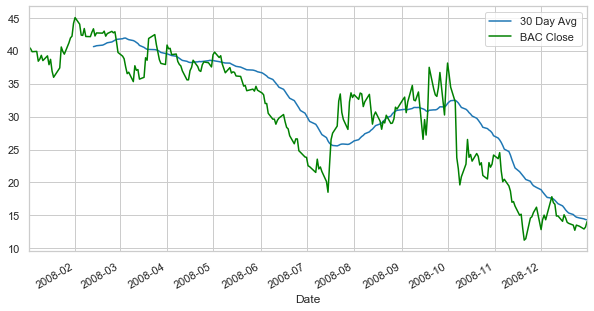

In [433]:
bank_stocks.xs('Close', axis=1, level=1).loc['2008-01-01':'2008-12-31']['BAC'].rolling(window=30).mean().plot(figsize=(10,5))
bank_stocks.xs('Close', axis=1, level=1).loc['2008-01-01':'2008-12-31']['BAC'].plot(color='green')
plt.legend(['30 Day Avg','BAC Close'])

**Create a heatmap of the correlation between the stocks Close Price.**

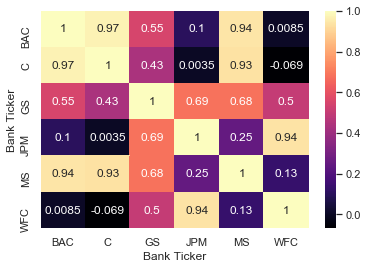

In [425]:
sns.heatmap(bank_stocks.xs('Close', axis=1, level=1).corr(), cmap='magma', annot=True)

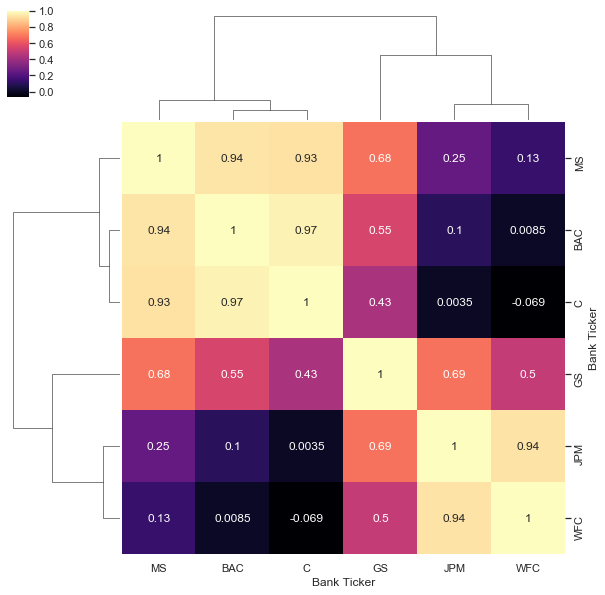

In [453]:
sns.clustermap(bank_stocks.xs('Close', axis=1, level=1).corr(), cmap='magma',annot=True)

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [457]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [458]:
bank_stocks.xs('Close', axis=1, level=1)['MS'].loc['2015-01-01':'2015-12-31'].ta_plot(study='sma', periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [459]:
bank_stocks.xs('Close', axis=1, level=1)['BAC'].loc['2015-01-01':'2015-12-31'].ta_plot(study='boll')

# End